# Загрузка Pandas и очистка данных

In [907]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import datetime as DT
%matplotlib inline

In [908]:
RANDOM_SEED = 42

In [909]:
df = pd.read_csv('main_task.csv')
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [910]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


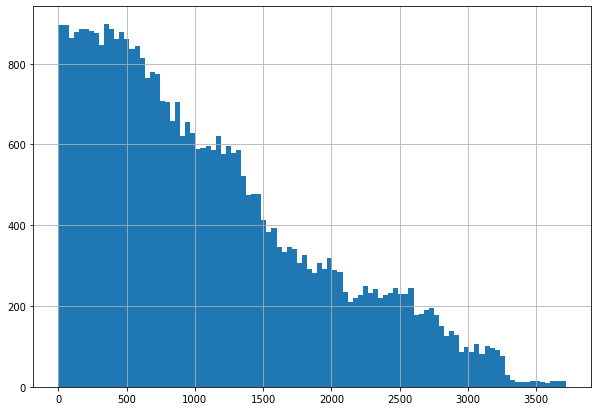

In [911]:
# Создадим признак ранг ресторана по городу, делённый на то, насколько крупный город по численности населения
df.City.unique()
city_dict = {'Paris': 5, 'Stockholm': 2, 'London': 5, 'Berlin': 4, 'Munich': 2, 'Oporto': 2,
             'Milan': 3, 'Bratislava': 1, 'Vienna': 2, 'Rome': 4, 'Barcelona': 3, 'Madrid': 3, 'Dublin': 2, 'Brussels': 2, 'Zurich': 2, 'Warsaw': 3, 'Budapest': 3, 'Copenhagen': 2, 'Amsterdam': 1, 'Lyon': 2, 'Hamburg': 2, 'Lisbon': 1, 'Prague': 2, 'Oslo': 2, 'Helsinki': 2, 'Edinburgh': 1, 'Geneva': 1, 'Ljubljana': 1, 'Athens': 1, 'Luxembourg': 1, 'Krakow': 2}
df['City_Cit'] = df['City'].replace(to_replace=city_dict)
df['City_Cit'] = df['Ranking']/df['City_Cit']
plt.rcParams['figure.figsize'] = (10, 7)
df['City_Cit'].hist(bins=100)

In [912]:
# Узнаем, сколько ресторанов в каждом городе
ty = df.groupby(["City"])
print(ty["Restaurant_id"].count().values)

[1086  628 2734 2155  301 1060  816  659  673  596  481  949  376  443
 1300  183 5757  210  892 3108 2133  893  513  385 4897 1443 2078  820
 1166  727  538]


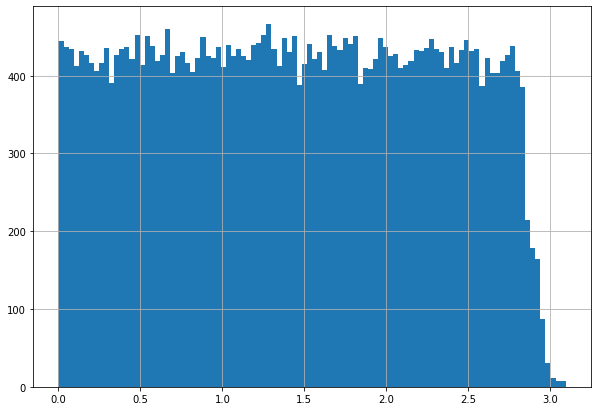

In [913]:
# Создадим признак ранг ресторана в городе, делённый на их количество в городе
keys = ['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Bratislava', 'Brussels',
        'Budapest', 'Copenhagen', 'Dublin', 'Edinburgh', 'Geneva', 'Hamburg',
        'Helsinki', 'Krakow', 'Lisbon', 'Ljubljana', 'London', 'Luxembourg',
        'Lyon', 'Madrid', 'Milan', 'Munich', 'Oporto', 'Oslo', 'Paris',
        'Prague', 'Rome', 'Stockholm', 'Vienna', 'Warsaw', 'Zurich']
values = [1086, 628, 2734, 2155,  301, 1060,  816,  659,  673,  596,  481,  949,  376,  443,
          1300,  183, 5757,  210,  892, 3108, 2133,  893,  513,  385, 4897, 1443, 2078,  820,
          1166,  727,  538]
d = dict(zip(keys, values))
df['City_Rank'] = df['City'].replace(to_replace=d)
df['City_Rank'] = df['Ranking']/df['City_Rank']
plt.rcParams['figure.figsize'] = (10, 7)
df['City_Rank'].hist(bins=100)

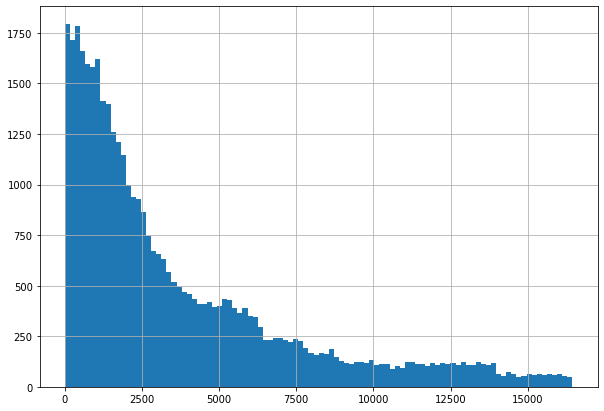

In [914]:
# Посмотрим, как выглядит распределение ранга
plt.rcParams['figure.figsize'] = (10, 7)
df['Ranking'].hist(bins=100)

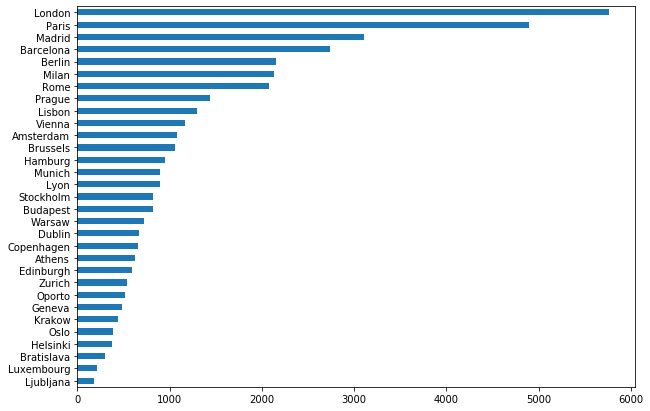

In [915]:
# И распределение по городам
df['City'].value_counts(ascending=True).plot(kind='barh')

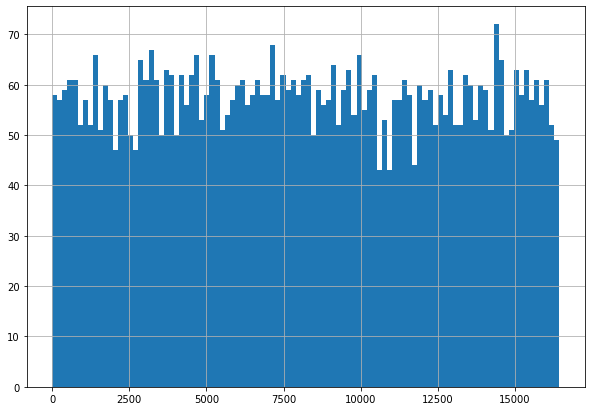

In [916]:
# Посмотрим, как распределён ранг в Лондоне
df['Ranking'][df['City'] == 'London'].hist(bins=100)

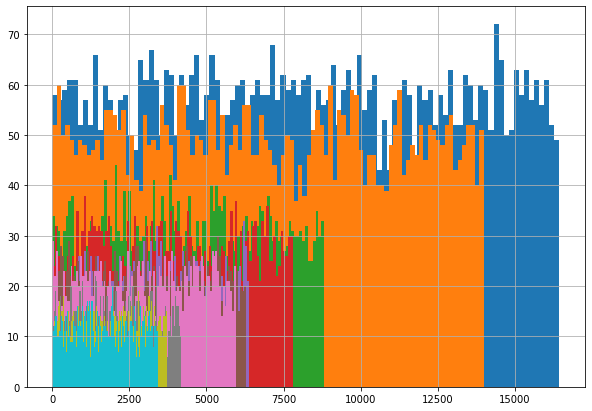

In [917]:
# посмотрим на топ 10 городов
for x in (df['City'].value_counts())[0:10].index:
    df['Ranking'][df['City'] == x].hist(bins=100)
plt.show()

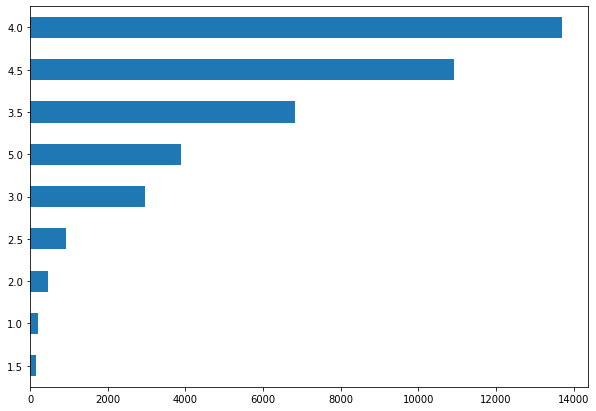

In [918]:
# Посмотрим, как распределён рейтинг
df['Rating'].value_counts(ascending=True).plot(kind='barh')

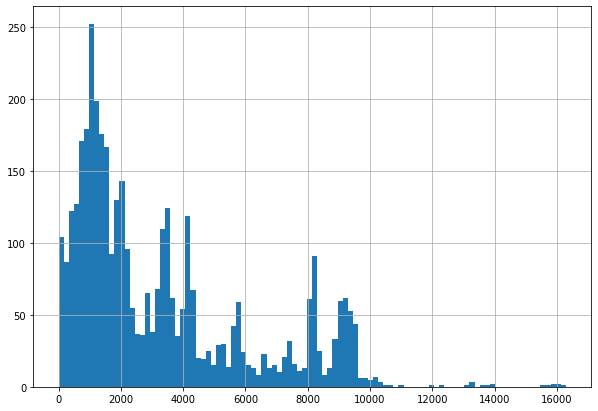

In [919]:
# Посмотрим, как распределён ранг у лучших ресторанов
df['Ranking'][df['Rating'] == 5].hist(bins=100)

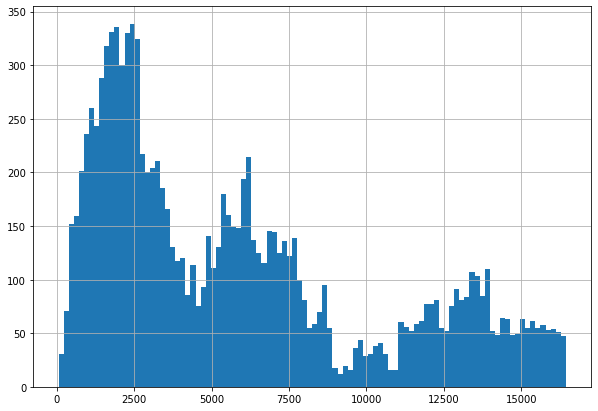

In [920]:
# И у тех, чей рейтинг < 4
df['Ranking'][df['Rating'] < 4].hist(bins=100)

In [921]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
 10  City_Cit           40000 non-null  float64
 11  City_Rank          40000 non-null  float64
dtypes: float64(5), object(7)
memory usage: 3.7+ MB


In [922]:
# Добавим столбец, указывающий, есть ли пропуск в столбце с количеством отзывов
df['Number_of_Reviews_isNAN'] = pd.isna(
    df['Number of Reviews']).astype('uint8')

In [923]:
# Заполним пропуски в столбце с количеством отзывов минимальным значением
df['Number of Reviews'] = df['Number of Reviews'].fillna(
    df['Number of Reviews'].min())

In [924]:
# Найдем дату и время последнего отзыва в формате unixtime
def rev(row):
    lst = 0
    r = (re.findall("\d\d\/\d\d\/\d{4}", row.Reviews))
    if len(r) == 1:
        lst = int(DT.datetime.strptime(r[0], '%m/%d/%Y').timestamp())
    if len(r) > 1:
        lst = int(DT.datetime.strptime(
            max(r[1], r[0]), '%m/%d/%Y').timestamp())
    return lst


df['last_rev'] = df.apply(lambda row: rev(row), axis=1)

In [925]:
# Найдем разницу в днях между отзывами
def interval(row):
    inter = 0
    r = (re.findall("\d\d\/\d\d\/\d{4}", row.Reviews))
    if len(r) == 1:
        inter = 0
    if len(r) > 1:
        inter = abs(pd.to_datetime(r[0])-pd.to_datetime(r[1])).days
    return inter


df['interval'] = df.apply(lambda row: interval(row), axis=1)

In [926]:
# Переделаем формат диапазона цен
price_dict = {'$$$$': 2, '$$ - $$$': 1, '$': 0}
df['Price Range'] = df['Price Range'].fillna(1)
df['Price Range'] = df['Price Range'].replace(to_replace=price_dict)

In [927]:
# Посчитаем количество доступных кухонь для каждого ресторана
def cuisine(row):
    lst = 0
    r = (re.findall("\w+ *\w*", row['Cuisine Style']))
    lst = len(r)
    return lst


df['Cuisine Style'] = df['Cuisine Style'].fillna('[]')
df['num_cuisine'] = df.apply(lambda row: cuisine(row), axis=1)

In [928]:
# Cделаем небольшую предобработку, чтобы сократить количество уникальных значений в этом признаке.
# Для начала, найдем кухни, которые описывают большинство (90%) примеров.
# Потом оставим только этот топ кухонь, остальные назовем other:
cuisines_with_freqs = list(df["Cuisine Style"].value_counts())
top_cuisines_count = int(np.percentile(cuisines_with_freqs, 90))
all_cuisines = df['Cuisine Style'].value_counts().index
top_cuisines = list(all_cuisines)[:top_cuisines_count]
cuisines_to_throw_away = list(set(all_cuisines) - set(top_cuisines))
df.loc[df['Cuisine Style'].isin(cuisines_to_throw_away),
       'Cuisine Style'] = 'other'
# Проделаем то же для городов:
cities_with_freqs = list(df.City.value_counts())
top_cities_count = int(np.percentile(cities_with_freqs, 90))
all_cities = df.City.value_counts().index
top_cities = list(all_cities)[:top_cities_count]
cities_to_throw_away = list(set(all_cities) - set(top_cities))
df.loc[df['City'].isin(cities_to_throw_away),
       'City'] = 'other'
# Переделаем формат типов кухни и превратим их и города в dummy-переменные


def cuisine_new(row):
    r = pd.Series(re.findall("\w+ *\w*", row['Cuisine Style']))
    return r


df['Cuisine Style'] = df['Cuisine Style'].fillna('[]')
df['Cuisine Style'] = df.apply(lambda row: cuisine_new(row), axis=1)
df_with_dummies = pd.get_dummies(
    df, columns=["City", "Cuisine Style"], dummy_na=True)

C:\Users\bella\anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [929]:
# Создадим признак количество отзывов, делённое на рейтинг в городе. Так можно понять, насколько отзывы позитивные
df['rev_+-'] = df['Number of Reviews']/df['Ranking']

In [930]:
print(df_with_dummies.columns)

Index(['Restaurant_id', 'Ranking', 'Rating', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'City_Cit',
       'City_Rank', 'Number_of_Reviews_isNAN', 'last_rev', 'interval',
       'num_cuisine', 'City_Amsterdam', 'City_Athens', 'City_Barcelona',
       'City_Berlin', 'City_Bratislava', 'City_Brussels', 'City_Budapest',
       'City_Copenhagen', 'City_Dublin', 'City_Edinburgh', 'City_Geneva',
       'City_Hamburg', 'City_Helsinki', 'City_Krakow', 'City_Lisbon',
       'City_Ljubljana', 'City_London', 'City_Luxembourg', 'City_Lyon',
       'City_Madrid', 'City_Milan', 'City_Munich', 'City_Oporto', 'City_Oslo',
       'City_Paris', 'City_Prague', 'City_Rome', 'City_Stockholm',
       'City_Vienna', 'City_Warsaw', 'City_Zurich', 'City_nan',
       'Cuisine Style_French', 'Cuisine Style_Italian',
       'Cuisine Style_Spanish', 'Cuisine Style_other', 'Cuisine Style_nan'],
      dtype='object')


In [931]:
df = df_with_dummies

In [932]:
# Удалим лишние столбцы
df = df.drop(['Reviews', 'Restaurant_id', 'URL_TA', 'ID_TA'], axis=1)

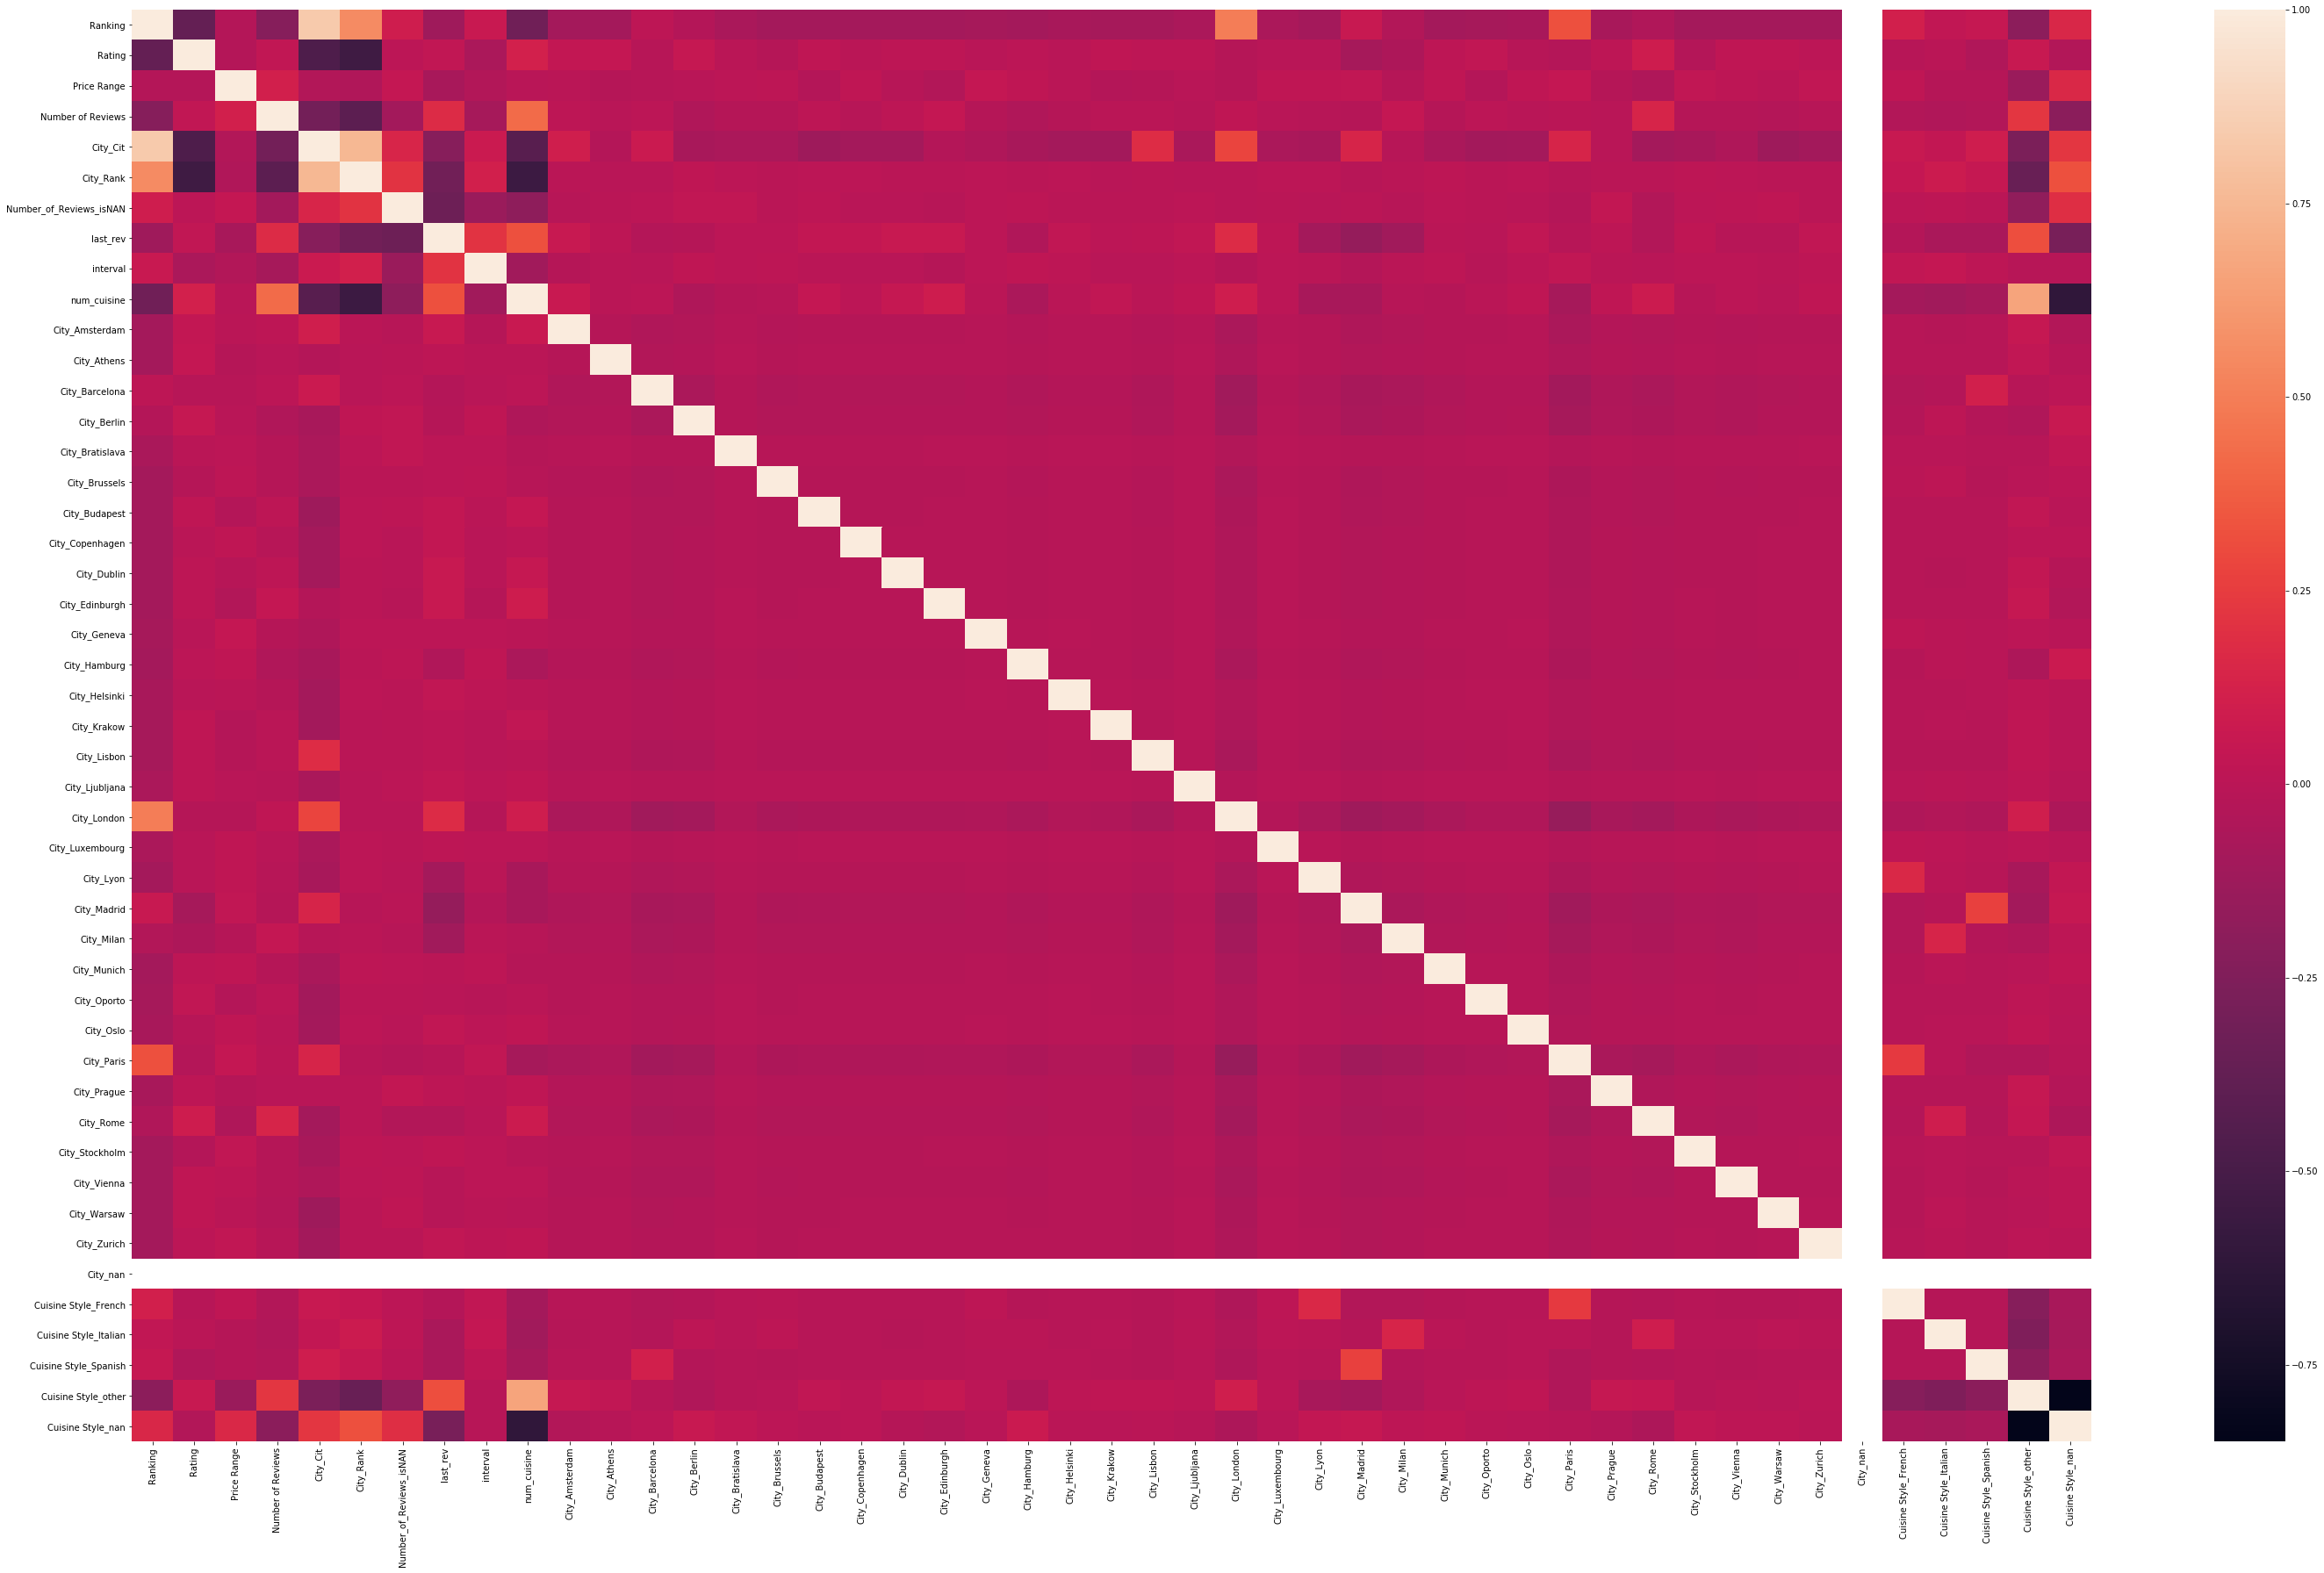

In [933]:
# Посмотрим на корреляции между признаками
plt.rcParams['figure.figsize'] = (50, 30)
sns.heatmap(df.corr(),)

Вывод: сильнее всего рейтинг коррелирует с признаком "ранг ресторана в городе, делённый на их количество в городе" и "ранг ресторана по городу, делённый на то, насколько крупный город по численности населения"

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [934]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Rating'], axis=1)
y = df['Rating']

In [935]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [936]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [937]:
# Импортируем необходимые библиотеки:
# инструмент для создания и обучения модели
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics  # инструменты для оценки точности модели

In [938]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [939]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.2055585


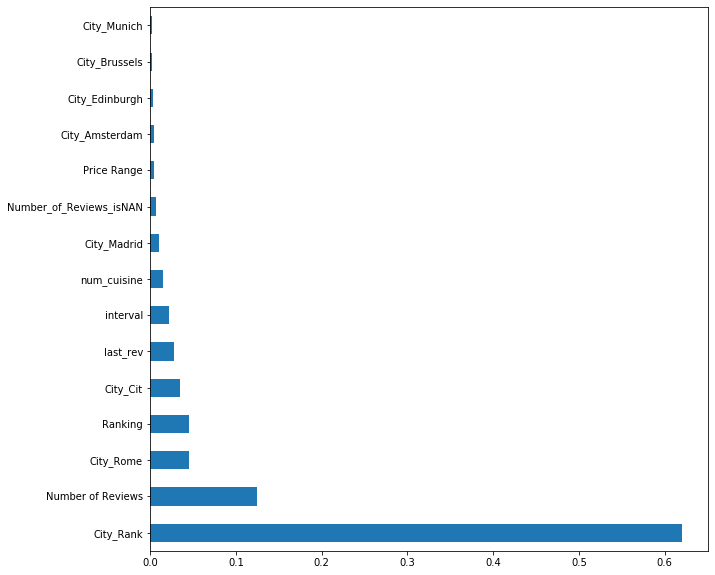

In [940]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

Вывод: наиболее важными для модели оказались созданные, а не первоначальные признаки. Создавая новые признаки, можно сделать ошибку ещё меньше

В ходе проекта мне удалось снизить MAE с 0.48 до 0.2055 

